# HydroGeoSines

## How to calculate and view an amplitude spectrum

### Import HGS
*Note*: Currently, the HydroGeoSines is not fully implemented as an installable package. Instead. we have to move to the parent directory, to import the package.

In [1]:
import os
os.chdir("../../")
print("Current Working Directory: " , os.getcwd())

Current Working Directory:  /home/olivier/work/chyn/volet4/projects/tidal_analysis/lib/HydroGeoSines


In [2]:
# Load the HGS package
import hydrogeosines as hgs
# and other packages used in this illustration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import a dataset

Import data from a CSV file:

In [3]:
fowlers = hgs.Site('Fowlers Gap', geoloc=[141.73099, -31.2934, 160])
fowlers.import_csv('tests/data/fowlers_gap/acworth_short.csv', 
                        input_category=['BP', 'GW', 'GW', 'GW', 'ET'],
                        utc_offset = 10,
                        unit=['m', 'm', 'm', 'm', 'm**2/s**2'],
                        loc_names = ["Baro", "FG822-1", "FG822-2", "Smith", "ET"],
                        how="add", check_duplicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No duplicate entries were found.


### Calculating the spectrum

Now we can calculate a spectrum for the heads:

In [4]:
process = hgs.Processing(fowlers)

fft_results  = process.fft(update=True)

-------------------------------------------------
Method: fft
['category', 'location', 'part', 'unit']
                                                          value
category location part unit datetime                           
GW       FG822-1  all  m    2014-10-20 14:00:00+00:00  144.3231
                            2014-10-20 14:15:00+00:00  144.3220
                            2014-10-20 14:30:00+00:00  144.3215
                            2014-10-20 14:45:00+00:00  144.3211
                            2014-10-20 15:00:00+00:00  144.3209
...                                                         ...
                            2015-01-06 05:45:00+00:00  144.1773
                            2015-01-06 06:00:00+00:00  144.1762
                            2015-01-06 06:15:00+00:00  144.1762
                            2015-01-06 06:30:00+00:00  144.1764
                            2015-01-06 06:45:00+00:00  144.1764

[7460 rows x 1 columns]
['category', 'location', 'part', 'unit']

/home/olivier/work/chyn/volet4/projects/tidal_analysis/lib/HydroGeoSines/hydrogeosines/ext/pandas_hgs.py:144: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = self._obj[a].groupby(self.filters.obj_col).resample(str(int(freq_groupby[i]))+"S", on="datetime", origin=origin).mean()
/home/olivier/work/chyn/volet4/projects/tidal_analysis/lib/HydroGeoSines/hydrogeosines/ext/pandas_hgs.py:144: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  temp = self._obj[a].groupby(self.filters.obj_col).resample(str(int(freq_groupby[i]))+"S", on="datetime", origin=origin).mean()
/home/olivier/work/chyn/volet4/projects/tidal_analysis/lib/HydroGeoSines/hydrogeosines/ext/pandas_hgs.py:144: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
Calculating FFT for location: FG822-1
Data category: GW
Data category: BP
Data category: ET
Calculating FFT for location: FG822-2
Data category: GW
Data category: BP
Data category: ET
Calculating FFT for location: Smith
Data category: GW
Data category: BP
Data category: ET


### Visualising the results

The corrected heads are in the results object:

-------------------------------------------------
Plotting location: FG822-1
Plotting location: FG822-1
Plotting location: FG822-1
Plotting location: FG822-2
Plotting location: FG822-2
Plotting location: FG822-2
Plotting location: Smith
Plotting location: Smith
Plotting location: Smith


{('FG822-1', 'all', 'GW'): <Figure size 640x480 with 1 Axes>,
 ('FG822-1', 'all', 'BP'): <Figure size 640x480 with 1 Axes>,
 ('FG822-1', 'all', 'ET'): <Figure size 640x480 with 1 Axes>,
 ('FG822-2', 'all', 'GW'): <Figure size 640x480 with 1 Axes>,
 ('FG822-2', 'all', 'BP'): <Figure size 640x480 with 1 Axes>,
 ('FG822-2', 'all', 'ET'): <Figure size 640x480 with 1 Axes>,
 ('Smith', 'all', 'GW'): <Figure size 640x480 with 1 Axes>,
 ('Smith', 'all', 'BP'): <Figure size 640x480 with 1 Axes>,
 ('Smith', 'all', 'ET'): <Figure size 640x480 with 1 Axes>}

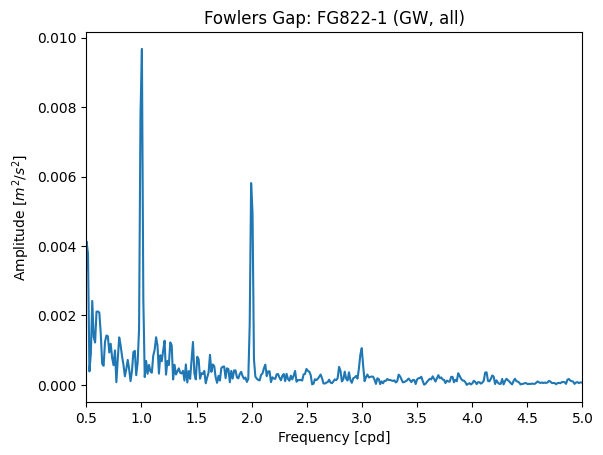

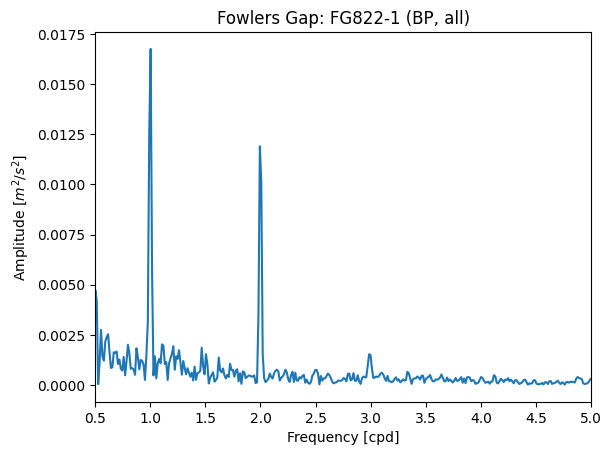

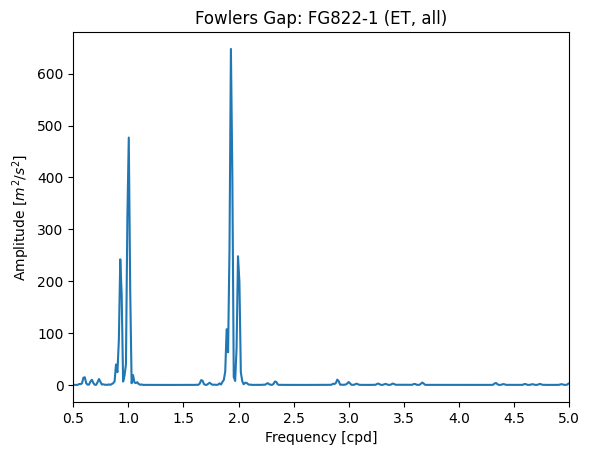

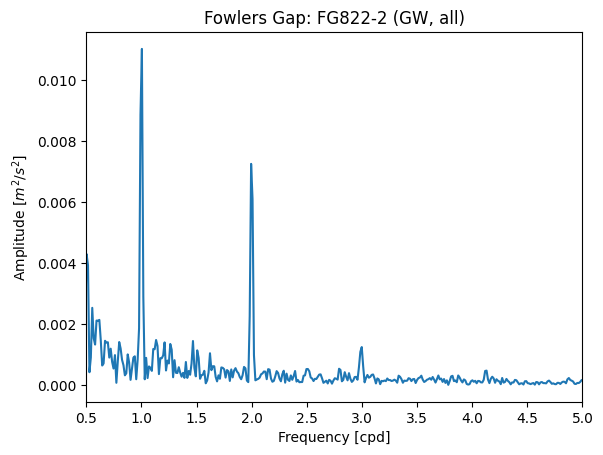

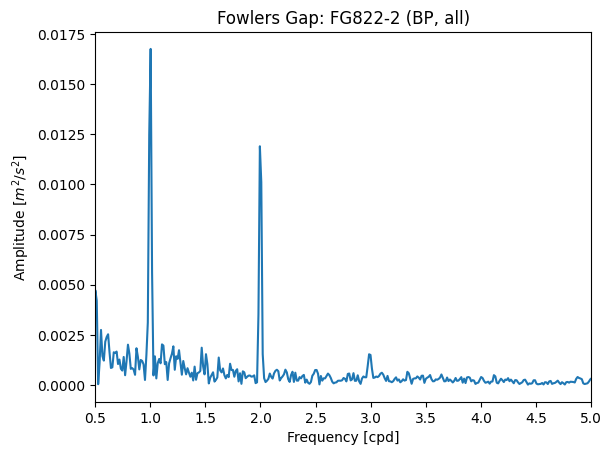

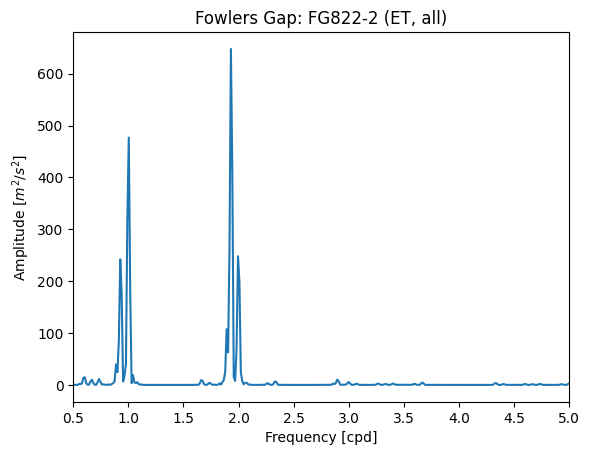

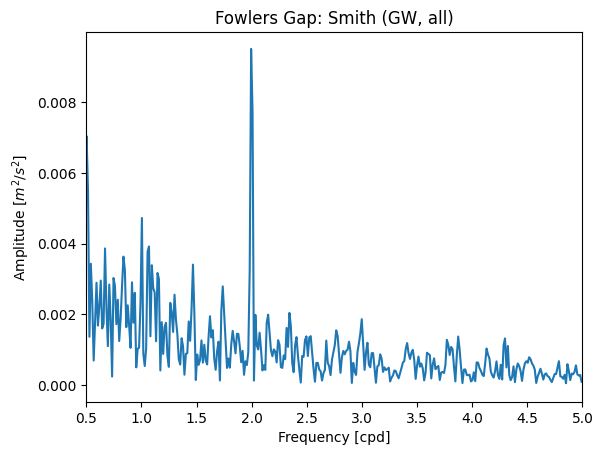

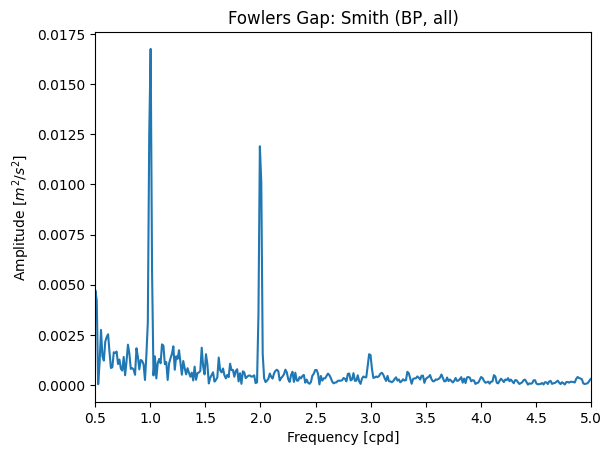

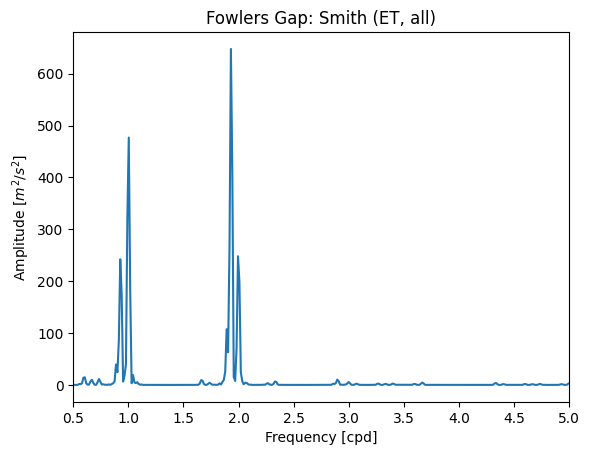

In [5]:
hgs.Output(fft_results).plot(xlim=[0.5, 5])